In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
ROOT_DIR = os.getcwd()
DIR_PROJECT = ROOT_DIR +'\Imagens Utilizadas'
for dirname, _, filenames in os.walk(DIR_PROJECT):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

d:\Trabalhos\Processamento digital de imagens\Imagens Para PRJ\Detec-o-de-COVID19\Imagens Utilizadas\test\COVID19\COVID19(460).jpg
d:\Trabalhos\Processamento digital de imagens\Imagens Para PRJ\Detec-o-de-COVID19\Imagens Utilizadas\test\COVID19\COVID19(461).jpg
d:\Trabalhos\Processamento digital de imagens\Imagens Para PRJ\Detec-o-de-COVID19\Imagens Utilizadas\test\COVID19\COVID19(463).jpg
d:\Trabalhos\Processamento digital de imagens\Imagens Para PRJ\Detec-o-de-COVID19\Imagens Utilizadas\test\COVID19\COVID19(464).jpg
d:\Trabalhos\Processamento digital de imagens\Imagens Para PRJ\Detec-o-de-COVID19\Imagens Utilizadas\test\COVID19\COVID19(465).jpg
d:\Trabalhos\Processamento digital de imagens\Imagens Para PRJ\Detec-o-de-COVID19\Imagens Utilizadas\test\COVID19\COVID19(466).jpg
d:\Trabalhos\Processamento digital de imagens\Imagens Para PRJ\Detec-o-de-COVID19\Imagens Utilizadas\test\COVID19\COVID19(467).jpg
d:\Trabalhos\Processamento digital de imagens\Imagens Para PRJ\Detec-o-de-COVID19\I

In [2]:
import zipfile
import os
%pip install tensorflow
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import KFold



## Prepare Data


In [4]:
train_dir = DIR_PROJECT+"/train"
os.listdir(train_dir)

['COVID19', 'NORMAL']

In [5]:
test_dir = DIR_PROJECT+"/test"
os.listdir(test_dir)

['COVID19', 'NORMAL']

In [6]:
print(len(os.listdir(train_dir+"/COVID19")))
print(len(os.listdir(train_dir+"/NORMAL")))



400
400


In [7]:
print(len(os.listdir(test_dir+"/COVID19")))
print(len(os.listdir(test_dir+"/NORMAL")))



100
100


## Observing a sample image of each X-ray class


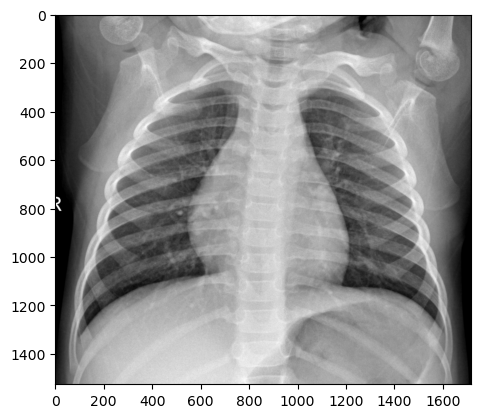

In [8]:
normal_sample = imread(train_dir+"/NORMAL"+"/NORMAL(976).jpg")
plt.imshow(normal_sample)


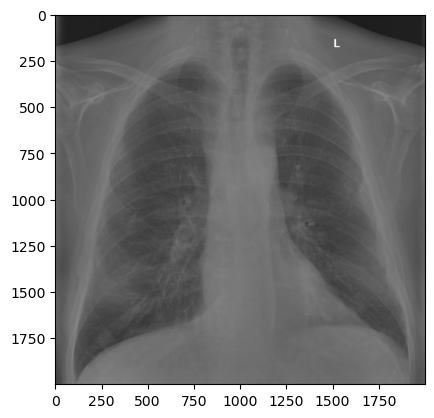

In [9]:
covid_sample = imread(train_dir+"/COVID19"+"/COVID19(187).jpg")
plt.imshow(covid_sample, cmap= "gray")


In [10]:
image_size = (400,400,3)



## Image generator


## Training generator

In [11]:
train_generator = tf.keras.utils.image_dataset_from_directory (
    train_dir,
    image_size=image_size[:2],
    color_mode='rgb',
    class_names=['COVID19', 'NORMAL'],
    batch_size=32,
    shuffle=True,
    interpolation='nearest',
)

Found 800 files belonging to 2 classes.


## Testing generator

In [12]:
test_generator =tf.keras.utils.image_dataset_from_directory (
    test_dir,
    image_size=image_size[:2],
    color_mode='rgb',
    class_names=['COVID19', 'NORMAL'],
    batch_size=32,
    shuffle=True,
    interpolation='nearest',
)

Found 200 files belonging to 2 classes.


In [13]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)
train_images = np.concatenate(list(train_generator.map(lambda x, y:x)))
train_labels = np.concatenate(list(train_generator.map(lambda x, y:y)))

val_images = np.concatenate(list(test_generator.map(lambda x, y:x)))
val_labels = np.concatenate(list(test_generator.map(lambda x, y:y)))

inputs = np.concatenate((train_images, val_images), axis=0)
targets = np.concatenate((train_labels, val_labels), axis=0)
print(inputs, len(inputs),targets,len(targets))
kfold = KFold(n_splits=5, shuffle=True)

[[[[ 35  35  35]
   [ 36  36  36]
   [ 31  31  31]
   ...
   [ 36  36  36]
   [ 32  32  32]
   [ 34  34  34]]

  [[ 31  31  31]
   [ 35  35  35]
   [ 28  28  28]
   ...
   [ 40  40  40]
   [ 39  39  39]
   [ 34  34  34]]

  [[ 30  30  30]
   [ 33  33  33]
   [ 28  28  28]
   ...
   [ 40  40  40]
   [ 40  40  40]
   [ 45  45  45]]

  ...

  [[ 26  26  26]
   [ 31  31  31]
   [ 28  28  28]
   ...
   [ 35  35  35]
   [ 43  43  43]
   [ 37  37  37]]

  [[ 30  30  30]
   [ 25  25  25]
   [ 25  25  25]
   ...
   [ 34  34  34]
   [ 38  38  38]
   [ 36  36  36]]

  [[ 30  30  30]
   [ 25  25  25]
   [ 29  29  29]
   ...
   [ 36  36  36]
   [ 41  41  41]
   [ 39  39  39]]]


 [[[ 39  35  36]
   [ 38  34  35]
   [ 37  33  34]
   ...
   [194 193 193]
   [189 188 188]
   [130 128 129]]

  [[ 35  31  32]
   [ 35  31  32]
   [ 37  33  34]
   ...
   [192 191 191]
   [189 188 188]
   [125 123 123]]

  [[ 35  31  32]
   [ 41  37  38]
   [ 38  35  35]
   ...
   [190 189 189]
   [192 191 191]
   [130 128

## Creating Model 3
### CNN with KFOLd

In [20]:
melhor_treino_medio=list()
melhor_history_medio=list()
melhor_scores_medio = list()
for train, test in kfold.split(inputs, targets):
  
  model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=image_size),
  tf.keras.layers.Conv2D(filters = 32, padding = "same", kernel_size = (3,3), strides = (3,3), activation = "relu"),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.Conv2D(filters = 32, padding = "same", kernel_size = (3,3), strides = (3,3), activation = "relu"),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.Conv2D(filters = 32, padding = "same", kernel_size = (3,3), strides = (3,3), activation = "relu"),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 1024, activation = "relu"),
  tf.keras.layers.Dense(units = 10, activation = "sigmoid")])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=60,
              callbacks=[stop])
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  melhor_treino_medio.append(model)
  melhor_history_medio.append(history)
  melhor_scores_medio.append(scores)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.4385 - loss: 1.3100
Epoch 2/60


d:\Anaconda\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.4904 - loss: 0.7121
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.5342 - loss: 0.7055
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.4984 - loss: 0.6971
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.4935 - loss: 0.6926
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.5710 - loss: 0.6899
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.5712 - loss: 0.6860
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.5432 - loss: 0.6916
Epoch 9/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.5468 - loss: 0.6896
Epoch 10/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.5669 - loss: 0.6794
Epoch 11/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.5813 - loss: 0.6737
Epoch 12/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.5531 - loss: 0.6651
Epoch 13/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accurac

## Mean model by a accuracy mean

In [39]:
from statistics import mean

history=melhor_treino_medio[0].history

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 132)            │       304,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         7,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 975,671 (3.72 MB)

 Trainable params: 325,223 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 650,448 (2.48 MB)

## Visualize Training


<Axes: >

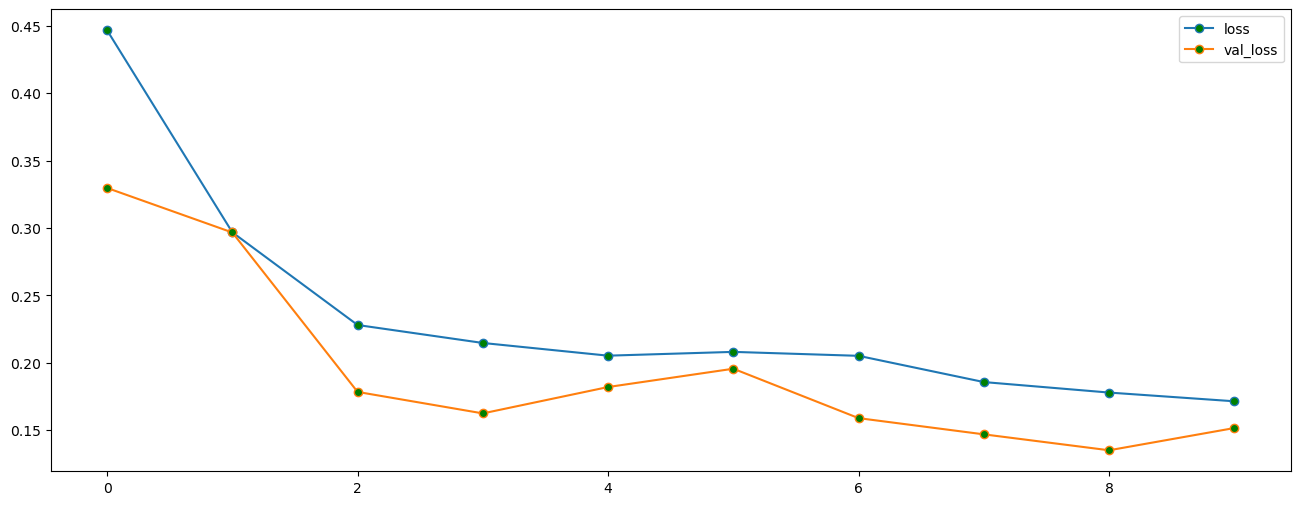

In [28]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot(figsize =(16,6), marker = "o", mfc = "g")

<Axes: >

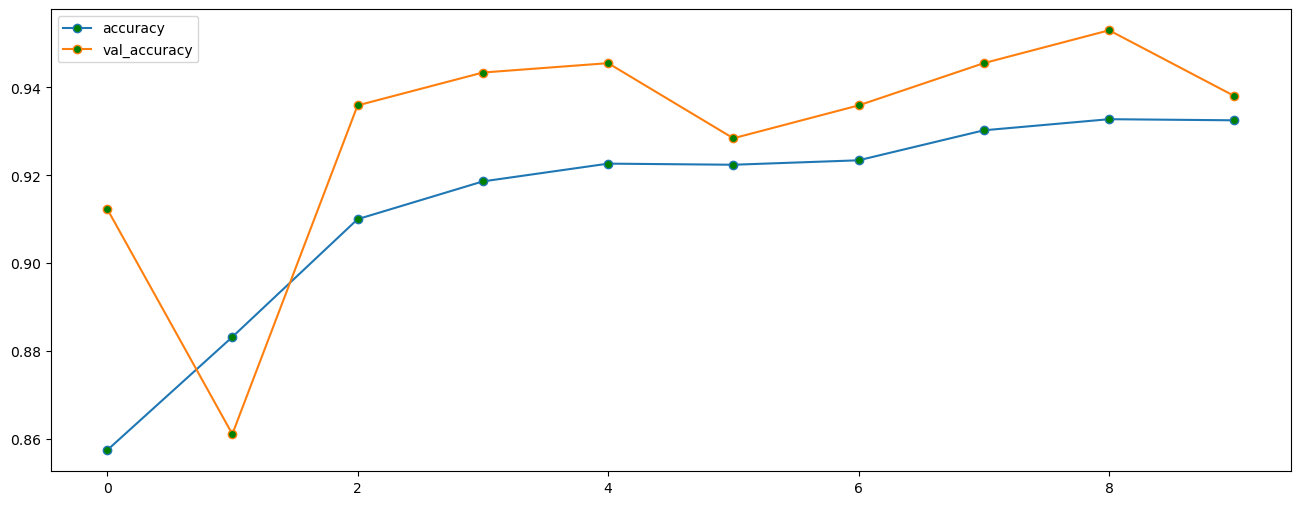

In [29]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot(figsize =(16,6), marker = "o", mfc = "g")

## predict

In [30]:
predictions = model.predict(test_generator)
predictions



30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step


array([[9.4108933e-01, 5.6548025e-03, 5.3255916e-02],
       [9.5985526e-01, 2.5092002e-02, 1.5052754e-02],
       [9.5715404e-01, 7.9684062e-03, 3.4877535e-02],
       ...,
       [1.2091822e-05, 5.8825677e-03, 9.9410534e-01],
       [3.3470243e-08, 4.8889156e-04, 9.9951112e-01],
       [1.5160004e-05, 3.4240682e-02, 9.6574414e-01]], dtype=float32)

In [31]:
pred_labels = np.argmax(predictions, axis = 1)


## Random Image testing


In [32]:
from random import randint
random_index = randint(1, len(os.listdir(train_dir+"/COVID19")))
random_covid_image_name = os.listdir(train_dir+"/COVID19")[random_index]
random_covid_image_name

'COVID19(173).jpg'

In [33]:
covid_img_path = train_dir+"/COVID19/"+random_covid_image_name


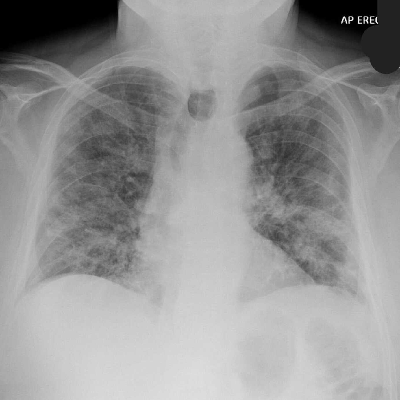

In [35]:
random_covid_img = image.load_img(covid_img_path, target_size=image_size)
random_covid_img

In [36]:
random_covid_img_array = image.img_to_array(random_covid_img)
covid_img_array = np.expand_dims(random_covid_img_array, axis=0)
covid_img_array.shape



(1, 400, 400, 3)

In [37]:
np.argmax(model.predict(covid_img_array), axis =1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


array([2], dtype=int64)

In [38]:
test_generator.class_indices


{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}